# Klasifikasi Kucing dan Kelinci
# A1_K8 :
## Al Fiana Nur Priyanti (2109106022)
## Shafira Octafia (2109106023)

## Import Library

In [90]:
import os
import numpy as np
import pandas as pd
import splitfolders
import seaborn as sns 
import tensorflow as tf
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Data Collecting
Sumber Dataset : https://www.kaggle.com/datasets/muniryadi/cat-vs-rabbit

In [91]:
base_dir = 'files/'
os.listdir(base_dir)

['Cat', 'Rabbit']

In [92]:
cat_dir = os.path.join(base_dir, 'Cat')
rabbit_dir = os.path.join(base_dir, 'Rabbit')

In [93]:
splitfolders.ratio(base_dir, output=base_dir, seed=1337, ratio=(0.8, 0.2))

dataset_train = os.path.join(base_dir, 'train')
dataset_val = os.path.join(base_dir, 'val')

Copying files: 2029 files [00:11, 184.16 files/s]


In [94]:
cat_train, cat_val = train_test_split(os.listdir(cat_dir), test_size=0.2)
rabbit_train, rabbit_val = train_test_split(os.listdir(rabbit_dir), test_size=0.2)

In [95]:
cat_train = os.path.join(dataset_train, 'Cat')
rabbit_train = os.path.join(dataset_train, 'Rabbit')

cat_val = os.path.join(dataset_val, 'Cat')
rabbit_val = os.path.join(dataset_val, 'Rabbit')

In [96]:
dataset_train = image_dataset_from_directory(
    'files/train',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Cat', 'Rabbit'],
    image_size = (80, 80),
    shuffle = True,
    seed = 47,
    validation_split = 0.2, # 20% Data untuk validasi
    subset = 'training'
)

dataset_val = image_dataset_from_directory(
    'files/val',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Cat', 'Rabbit'],
    image_size = (80, 80),
    shuffle = True,
    seed = 47,
    validation_split = 0.2, # 20% Data untuk validasi
    subset = 'validation'
)

Found 1622 files belonging to 2 classes.
Using 1298 files for training.
Found 407 files belonging to 2 classes.
Using 81 files for validation.


# Data Preprocessing
## Preview Image

In [97]:
class_names = dataset_train.class_names
class_names

['Cat', 'Rabbit']

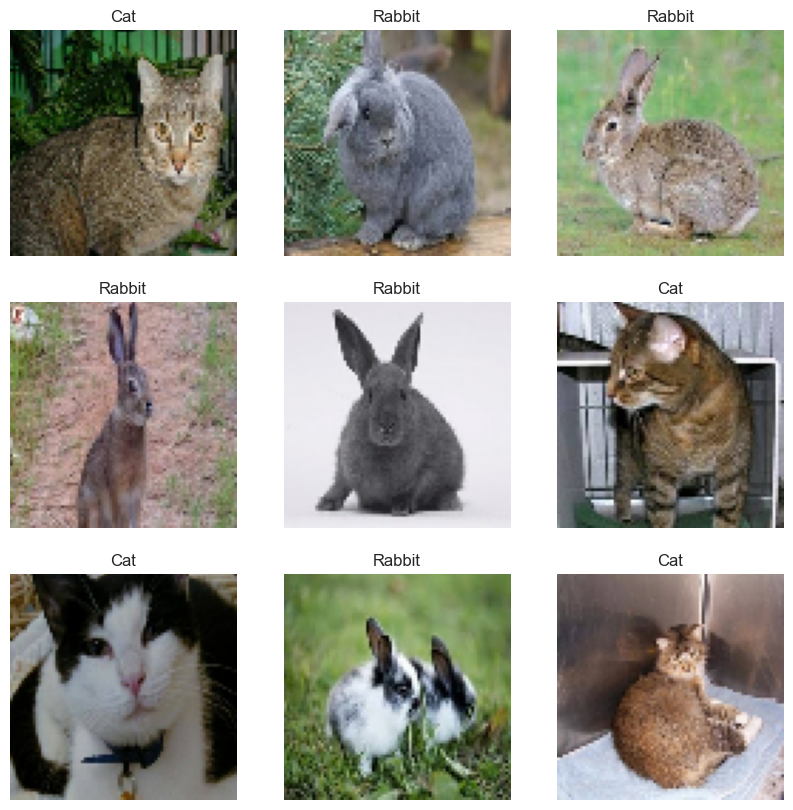

In [98]:
plt.figure(figsize=(10,10))

for images, labels in dataset_train.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    sebelum = images[0]

## Augmentasi Gambar

In [99]:
def augment (x,y):
    image = tf.image.random_hue (x,max_delta = 0.5, seed=42)
    return image, y

In [100]:
train = dataset_train.map(augment)

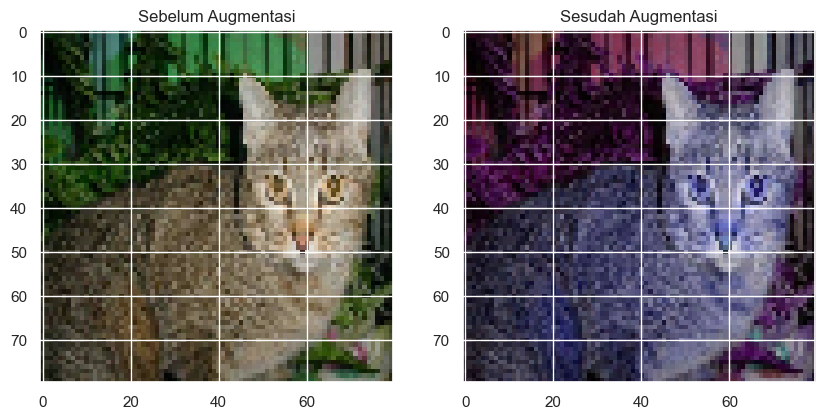

In [101]:
def augmented (sebelum, sesudah):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.title("Sebelum Augmentasi")
    plt.imshow(sebelum.numpy().astype("uint8"))
    plt.subplot(1, 2, 2)
    plt.title("Sesudah Augmentasi")
    plt.imshow(sesudah.numpy().astype("uint8"))

augmented(sebelum, tf.image.random_hue(sebelum,max_delta = 0.5, seed=42))

# Data Analisis dan Visualisasi

In [102]:
train_temp = dataset_train.unbatch()
train_labels = []
for x, y in train_temp:
    index = y
    train_labels.append(class_names[index])
    
val_temp = dataset_val.unbatch()
val_labels = []
for x, y in val_temp:
    index = y
    val_labels.append(class_names[index])


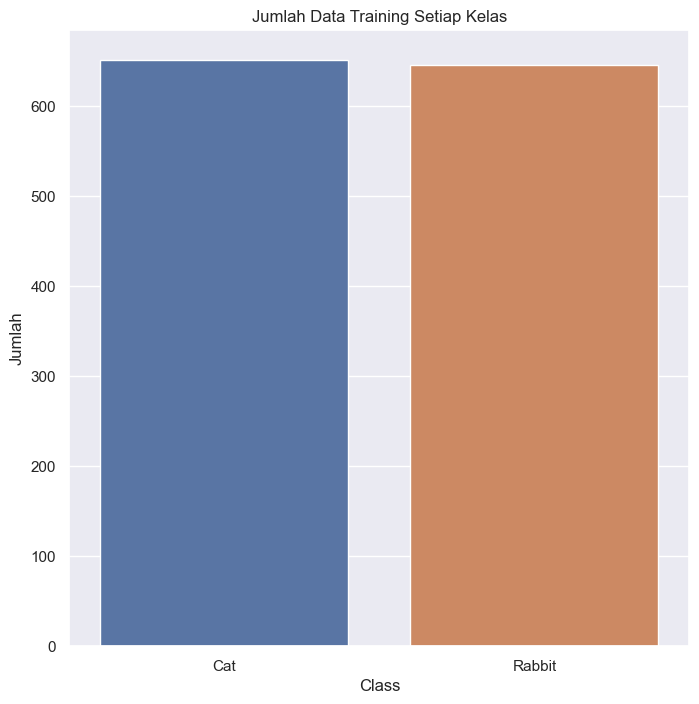

In [103]:
plt.figure(figsize=(8, 8))
sns.set_theme()
sns.countplot(x=train_labels)
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Training Setiap Kelas')
plt.show()

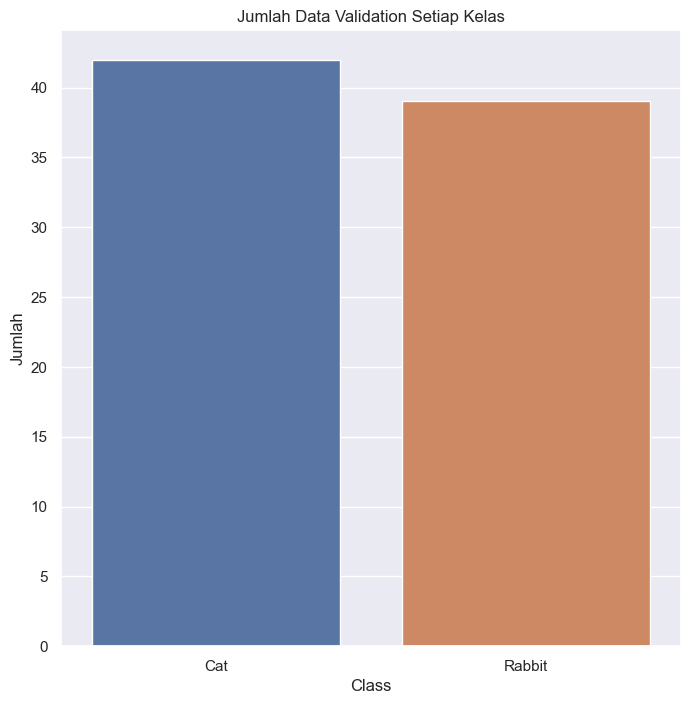

In [104]:
plt.figure(figsize=(8, 8))
sns.set_theme()
sns.countplot(x=val_labels)
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Validation Setiap Kelas')
plt.show()

# Modeling

In [105]:
from tensorflow import keras
    
model = keras.Sequential(
    [
        # Input
        layers.Input((80,80,3)),

        # Hidden Layer
        layers.Conv2D(16,3),
        layers.Conv2D(32,3),
        layers.MaxPool2D(),
        layers.Flatten(),

        # Output Layer
        layers.Dense(2) #Output layer mengikuti jumlah labelnya
    ]
)
    
model.compile(
    optimizer = 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

In [106]:
hasil = model.fit(dataset_train, validation_data = dataset_val, epochs=10, verbose=1)

Epoch 1/10
41/41 [==============================] - 14s 300ms/step - loss: 223.8962 - accuracy: 0.5647 - val_loss: 30.2944 - val_accuracy: 0.6296
Epoch 2/10
41/41 [==============================] - 10s 234ms/step - loss: 9.6891 - accuracy: 0.8120 - val_loss: 9.7331 - val_accuracy: 0.7160
Epoch 3/10
41/41 [==============================] - 14s 321ms/step - loss: 4.2621 - accuracy: 0.8521 - val_loss: 8.7337 - val_accuracy: 0.7407
Epoch 4/10
41/41 [==============================] - 14s 323ms/step - loss: 2.2800 - accuracy: 0.9129 - val_loss: 11.7891 - val_accuracy: 0.7284
Epoch 5/10
41/41 [==============================] - 14s 320ms/step - loss: 0.9226 - accuracy: 0.9361 - val_loss: 12.9072 - val_accuracy: 0.7284
Epoch 6/10
41/41 [==============================] - 10s 240ms/step - loss: 0.9295 - accuracy: 0.9438 - val_loss: 10.4139 - val_accuracy: 0.6914
Epoch 7/10
41/41 [==============================] - 9s 226ms/step - loss: 0.6142 - accuracy: 0.9630 - val_loss: 12.1141 - val_accuracy: 

# Evaluasi Model

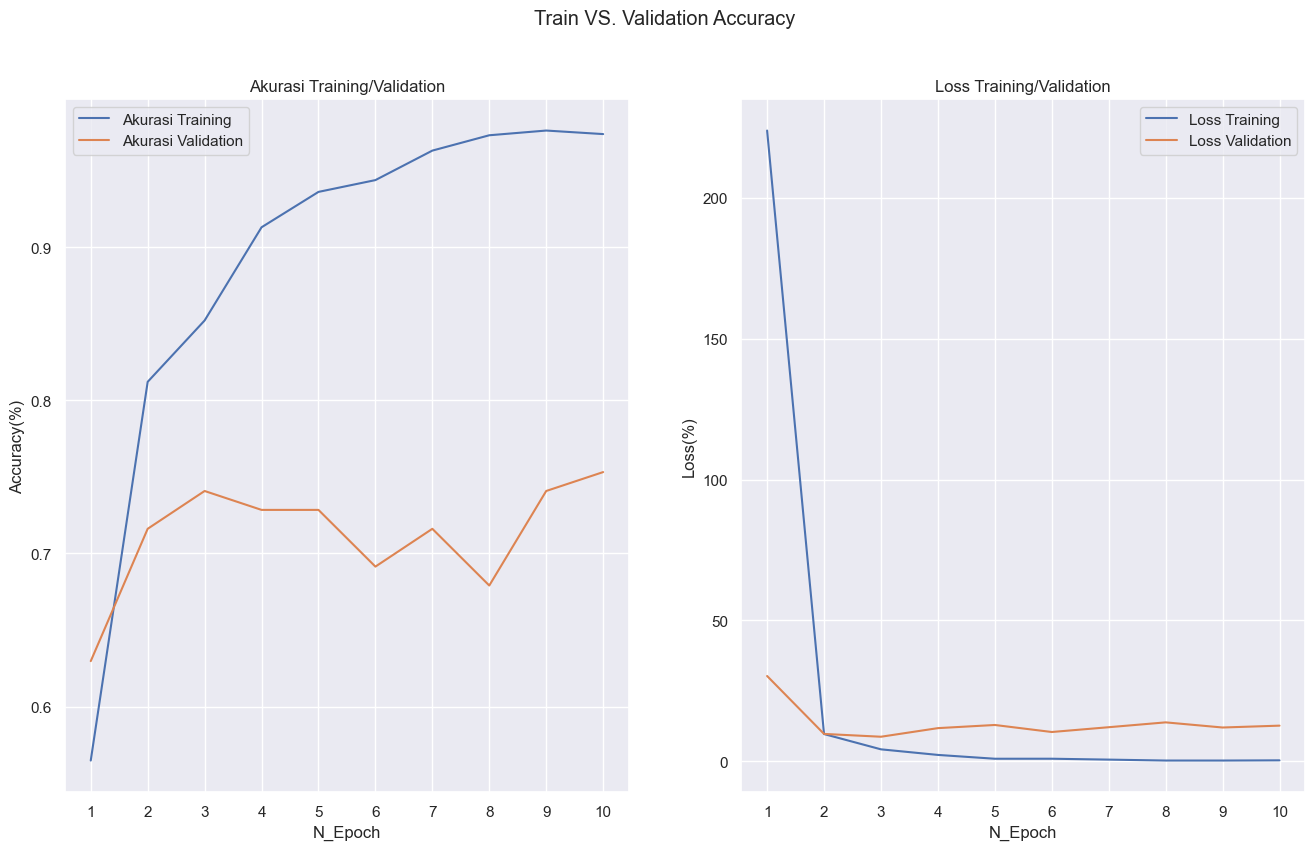

In [107]:
epoch = [i+1 for i in range(10)]

sns.set_theme()

plt.figure(figsize=(16,9))
plt.suptitle('Train VS. Validation Accuracy')

# Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch, y=hasil.history['accuracy'], label='Akurasi Training')
sns.lineplot(x=epoch, y=hasil.history['val_accuracy'], label='Akurasi Validation')

plt.xticks(epoch)
plt.xlabel('N_Epoch')
plt.ylabel('Accuracy(%)')
plt.title('Akurasi Training/Validation')

# Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch, y=hasil.history['loss'], label='Loss Training')
sns.lineplot(x=epoch, y=hasil.history['val_loss'], label='Loss Validation')

plt.xticks(epoch)
plt.xlabel('N_Epoch')
plt.ylabel('Loss(%)')
plt.title('Loss Training/Validation')

plt.show()

## Prediksi

1/1 [==============================] - 0s 33ms/step


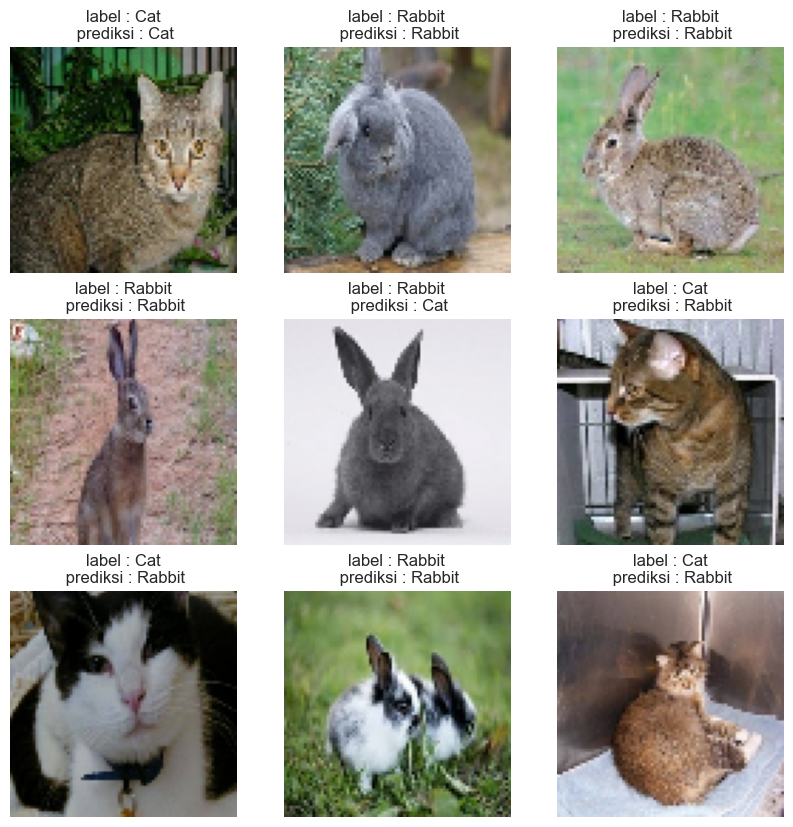

In [110]:
image, label = next(iter(dataset_val))

plt.figure(figsize=(10,10))
for i in range(9):
        plt.subplot(3,3, i+1)
        y_pred = np.argmax(model.predict(image[i][None, ...]))
        plt.imshow(tf.squeeze(images[i].numpy().astype("uint8")), cmap = 'Blues_r')
        plt.title(f'label : {class_names[labels[i]]}\n prediksi : {class_names[y_pred]}')
        plt.axis('off')